# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
        

NameError: name 'api_key' is not defined

In [42]:
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []

# Include a print log of each city as it'sbeing processed (with the city number and city name).
# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")


Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
City not found. Skipping...
Processing Record 3 of Set 1 | cap malheureux
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
City not found. Skipping...
Processing Record 5 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 6 of Set 1 | jeremoabo
City not found. Skipping...
Processing Record 7 of Set 1 | albany
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
City not found. Skipping...
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
City not found. Skipping...
Processing Record 11 of Set 1 | yeppoon
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
City not found. Skipping...
Processing Record 13 of Set 1 | ngunguru
City not found. Skipping...
Processing Record 14 of Set 1 

City not found. Skipping...
Processing Record 21 of Set 3 | mrirt
City not found. Skipping...
Processing Record 22 of Set 3 | ithaca
City not found. Skipping...
Processing Record 23 of Set 3 | cairns
City not found. Skipping...
Processing Record 24 of Set 3 | isangel
City not found. Skipping...
Processing Record 25 of Set 3 | los llanos de aridane
City not found. Skipping...
Processing Record 26 of Set 3 | paso de los toros
City not found. Skipping...
Processing Record 27 of Set 3 | castro
City not found. Skipping...
Processing Record 28 of Set 3 | mount gambier
City not found. Skipping...
Processing Record 29 of Set 3 | paamiut
City not found. Skipping...
Processing Record 30 of Set 3 | vrangel
City not found. Skipping...
Processing Record 31 of Set 3 | saleaula
City not found. Skipping...
Processing Record 32 of Set 3 | jalu
City not found. Skipping...
Processing Record 33 of Set 3 | yarensk
City not found. Skipping...
Processing Record 34 of Set 3 | tasiilaq
City not found. Skipping

City not found. Skipping...
Processing Record 42 of Set 5 | egvekinot
City not found. Skipping...
Processing Record 43 of Set 5 | guerrero negro
City not found. Skipping...
Processing Record 44 of Set 5 | alotau
City not found. Skipping...
Processing Record 45 of Set 5 | kulhudhuffushi
City not found. Skipping...
Processing Record 46 of Set 5 | anori
City not found. Skipping...
Processing Record 47 of Set 5 | hithadhoo
City not found. Skipping...
Processing Record 48 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 49 of Set 5 | leh
City not found. Skipping...
Processing Record 50 of Set 5 | luderitz
City not found. Skipping...
Processing Record 1 of Set 6 | lasa
City not found. Skipping...
Processing Record 2 of Set 6 | pokhara
City not found. Skipping...
Processing Record 3 of Set 6 | banjarmasin
City not found. Skipping...
Processing Record 4 of Set 6 | serebryansk
City not found. Skipping...
Processing Record 5 of Set 6 | vaitupu
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 11 of Set 8 | haines junction
City not found. Skipping...
Processing Record 12 of Set 8 | zhuanghe
City not found. Skipping...
Processing Record 13 of Set 8 | andra
City not found. Skipping...
Processing Record 14 of Set 8 | petrykiv
City not found. Skipping...
Processing Record 15 of Set 8 | sebezh
City not found. Skipping...
Processing Record 16 of Set 8 | minas
City not found. Skipping...
Processing Record 17 of Set 8 | mar del plata
City not found. Skipping...
Processing Record 18 of Set 8 | beloha
City not found. Skipping...
Processing Record 19 of Set 8 | kupang
City not found. Skipping...
Processing Record 20 of Set 8 | tongzi
City not found. Skipping...
Processing Record 21 of Set 8 | manta
City not found. Skipping...
Processing Record 22 of Set 8 | nome
City not found. Skipping...
Processing Record 23 of Set 8 | auki
City not found. Skipping...
Processing Record 24 of Set 8 | iquitos
City not found. Skipping...
Processing Record 25

City not found. Skipping...
Processing Record 30 of Set 10 | magaria
City not found. Skipping...
Processing Record 31 of Set 10 | aksu
City not found. Skipping...
Processing Record 32 of Set 10 | sao filipe
City not found. Skipping...
Processing Record 33 of Set 10 | bilibino
City not found. Skipping...
Processing Record 34 of Set 10 | norwich
City not found. Skipping...
Processing Record 35 of Set 10 | bourg-en-bresse
City not found. Skipping...
Processing Record 36 of Set 10 | marcona
City not found. Skipping...
Processing Record 37 of Set 10 | bollnas
City not found. Skipping...
Processing Record 38 of Set 10 | paita
City not found. Skipping...
Processing Record 39 of Set 10 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 10 | teya
City not found. Skipping...
Processing Record 41 of Set 10 | hay river
City not found. Skipping...
Processing Record 42 of Set 10 | ocos
City not found. Skipping...
Processing Record 43 of Set 10 | cockburn town
City not found. Skip

City not found. Skipping...
Processing Record 48 of Set 12 | tigil
City not found. Skipping...
Processing Record 49 of Set 12 | uttaradit
City not found. Skipping...
Processing Record 50 of Set 12 | tubinskiy
City not found. Skipping...
Processing Record 1 of Set 13 | sindor
City not found. Skipping...
Processing Record 2 of Set 13 | waddan
City not found. Skipping...
Processing Record 3 of Set 13 | kandy
City not found. Skipping...
Processing Record 4 of Set 13 | port macquarie
City not found. Skipping...
Processing Record 5 of Set 13 | andenes
City not found. Skipping...
------------------------------------------------
Data Retrieval Complete
------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          0
Lat           0
lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64


In [44]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

OSError: [Errno 28] No space left on device

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "hotpink", linewidths = .5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature (10/31/20)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("./output_data/citylatitude_vs_maxtemperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

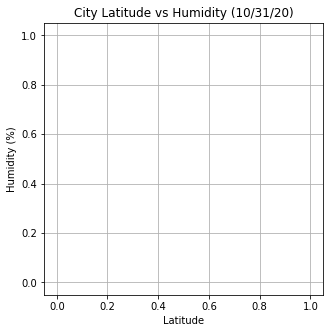

In [29]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "hotpink", linewidths = 5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (10/31/20)')
plt.grid()
plt.savefig("./output_data/citylatitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

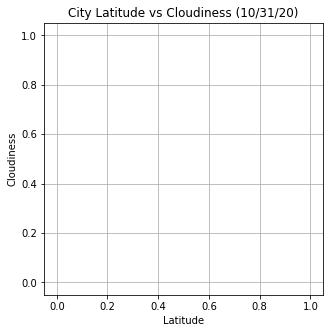

In [30]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "hotpink", linewidths = 5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness (10/31/20)')
plt.grid()
plt.savefig("./output_data/citylatitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

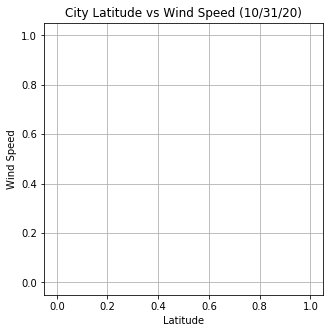

In [31]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "hotpink", linewidths = 5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed (10/31/20)')
plt.grid()
plt.savefig("./output_data/citylatitude_vs_windspeed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)




# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

SyntaxError: invalid syntax (<ipython-input-38-c941b7410fd7>, line 2)

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'regress_values' is not defined

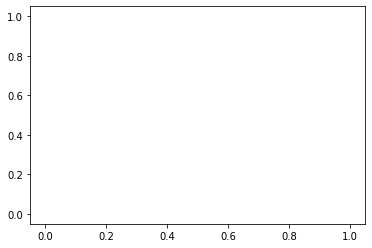

In [16]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="hotpink")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


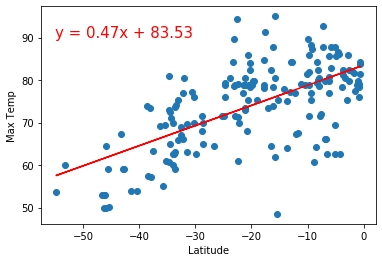

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


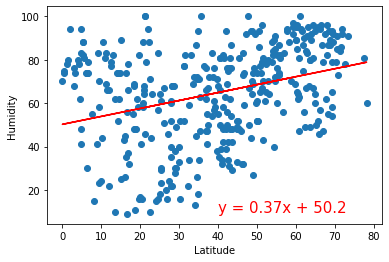

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


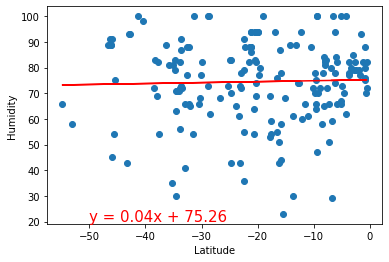

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


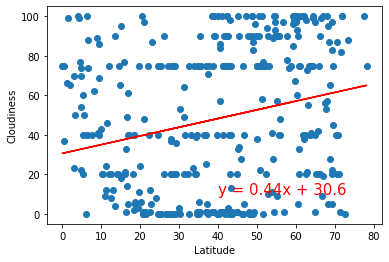

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


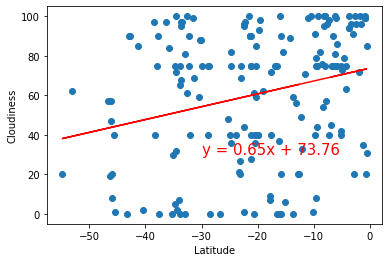

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


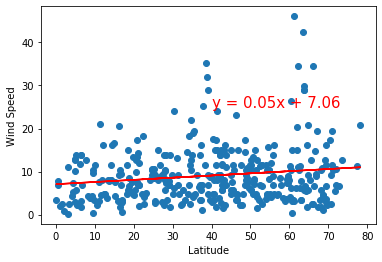

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


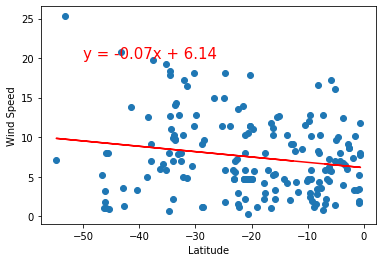